In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import re,os
import glob, traceback
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.dates as mdates

## 0. Read all csv files

In [128]:
df_2019 = pd.read_csv('/data2/julina/scripts/tweets/cleaned_data_by_year/2020.csv')
df_2019.drop_duplicates(subset=['text', 'created_at'], inplace=True)
df_2019 = df_2019.loc[:, ~df_2019.columns.str.match('Unnamed')]
df_2019.shape

(3502171, 17)

In [129]:
df_2019_r = pd.read_csv('/data2/julina/scripts/tweets/cleaned_data_by_year/junk/2020_emo.csv')
df_2019_r.drop_duplicates(subset=['text', 'created_at'], inplace=True)
df_2019_r = df_2019_r.loc[:, ~df_2019_r.columns.str.match('Unnamed')]
df_2019_r.shape

(2275943, 19)

In [130]:
new_df = pd.merge(df_2019, df_2019_r[['id', 'user_id', 'race', 'emotion']],  how='left', on=['id','user_id'])
new_df.shape

(3502171, 19)

In [131]:
df_2019_r.head(10)

,id,created_at,text,user_id,name,screen_name,description,DrugAbuse,lang,gender,age,org,sentiment,sent_score,date,is_teenage,drug_type,emotion,race
0,1214331878381170694,Mon Jan 06 23:44:15 +0000 2020,nova jut give nose boop first ever boop proud ...,1034618872413020161,Geralt Hm Fuck,lonioiHetairoi,Knell - 🇨🇦 26 - Pan - NB - they/them Nintendo ...,1,en,male,30-39,non-org,neu,0.0000,2020-01-01,0,[],"['joy', 'sadness']",white
1,1214331916163305477,Mon Jan 06 23:44:24 +0000 2020,USER drink miche work today,537793543,Ruben,messywuben,NaN,1,en,male,<=18,non-org,neu,0.0000,2020-01-01,1,[],[],white
2,1214331949717839873,Mon Jan 06 23:44:32 +0000 2020,go get drunk sleep,269070737,Le’🖤,__Lucy93,🌻 #fvsugraduate ig: letia93 ♎️☮️ 💫🧘🏾‍♀️ •••• •...,1,en,female,19-29,non-org,neg,-0.3400,2020-01-01,0,[],[],white
3,1214332046165913601,Mon Jan 06 23:44:55 +0000 2020,USER bring jacket bcos alcohol keep warm,1060380499292704776,Tray🦋,traydominic,the muse | IG: @traydominic | ♊︎,1,en,female,<=18,non-org,pos,0.2263,2020-01-01,1,[],"['joy', 'optimism']",white
4,1214332876629643265,Mon Jan 06 23:48:13 +0000 2020,gaspowered mower leaf blower weed whacker coul...,14093707,Sfist,SFist,Everything else you need to know about SF & th...,1,en,male,>=40,is-org,neu,0.0000,2020-01-01,0,['cannabinoids'],"['anger', 'disgust']",white
5,1214332901820653568,Mon Jan 06 23:48:19 +0000 2020,really need slow lot thing,1012224059218808832,Kaya,kaylalaboo,NaN,1,en,female,<=18,non-org,neu,0.0000,2020-01-01,1,[],[],api
6,1214332922787962880,Mon Jan 06 23:48:24 +0000 2020,USER lib dems push public inquiry referendum b...,2183274646,Brewer(S),botcotu,NaN,1,en,male,<=18,non-org,neu,0.0000,2020-01-01,1,[],"['anger', 'disgust']",white
7,1214332935362334720,Mon Jan 06 23:48:27 +0000 2020,USER try get rid toxic refuse leave alone HTTPURL,741528553926205440,Neon Panther,PackNeon,"Yo! I'm Neon, also known as Multihusky 👍 23y,...",1,en,male,30-39,non-org,neg,-0.5267,2020-01-01,0,[],[],white
8,1214333048612933633,Mon Jan 06 23:48:54 +0000 2020,USER fuck pure heroin time,1069690683169099776,444,miajames1234,patron saint,1,en,female,19-29,non-org,neg,-0.7717,2020-01-01,0,['opioids'],"['anger', 'disgust']",api
9,1214333069567520768,Mon Jan 06 23:48:59 +0000 2020,wait work get high af work day need end already,1103549674424688642,Highness🐉.,sunlyghtma,still searching for the elixir of immortality....,1,en,female,<=18,non-org,neu,0.0000,2020-01-01,1,[],['sadness'],white


In [132]:
# df_2020 = pd.read_csv('/data2/julina/scripts/tweets/cleaned_data_by_year/2020_race.csv')
# df_2020.drop_duplicates(subset=['text', 'created_at'], inplace=True)
# df_2020 = df_2020.loc[:, ~df_2020.columns.str.match('Unnamed')]
# df_2020.shape

In [133]:
# df_2021 = pd.read_csv('/data2/julina/scripts/tweets/cleaned_data_by_year/2021_race.csv')
# df_2021.drop_duplicates(subset=['text', 'created_at'], inplace=True)
# df_2021 = df_2021.loc[:, ~df_2021.columns.str.match('Unnamed')]
# df_2021.shape

# Radar plot

In [134]:
import ast

data = new_df
unique_emotions = ['anger', 'anticipation', 'disgust', 'fear', 'hopeless', 'joy', 'love', 'optimism', 'sadness', 'surprise', 'trust']
data['emotion'] = data['emotion'].replace('', '[]')

data['emotion'] = data['emotion'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

df_exploded = data.explode('emotion')
df_dummies = pd.get_dummies(df_exploded['emotion'])
df_aggregated = df_dummies.groupby(df_exploded.index).sum()
data = data.drop(columns='emotion').join(df_aggregated)


In [135]:
years = [2019, 2020, 2021]

all_data = {y: {} for y in years}
age_groups = ['<=18','19-29', '30-39', '>=40']
race_groups = ['api', 'white', 'hispanic', 'black']
metrics = ['Org', 'Person', 'Female', 'Male'] + age_groups + race_groups 

for i, y in enumerate(years):
    result_map = {metric: [] for metric in metrics}
    
    o = data[data['org'] =='is-org']
    p = data[data['org'] !='is-org']
    
    m = p[p['gender'] =='male']
    f = p[p['gender'] =='female']
    
    ages = {}
    for age in age_groups:
        ages[age] = p[p['age'] == age]
    
    races = {}
    for race in race_groups:
        races[race] = p[p['race'] == race]
        
    result_map['Org'] = o[list(unique_emotions)].mean().round(3)
    result_map['Person']  = p[list(unique_emotions)].mean().round(3)
    result_map['Male']  = m[list(unique_emotions)].mean().round(3)
    result_map['Female']  = f[list(unique_emotions)].mean().round(3)
    
    for age in age_groups:
        result_map[age] = ages[age][list(unique_emotions)].mean().round(3)
    
    for race in race_groups:
        result_map[race] = races[race][list(unique_emotions)].mean().round(3)
    
    all_data[y] = result_map
    # combined_result = pd.concat(all_data[year], axis=1) 
    # print(combined_result)

In [136]:
combined_result = pd.concat(all_data[2019], axis=1) #axis=1
combined_result

,Org,Person,Female,Male,<=18,19-29,30-39,>=40,api,white,hispanic,black
anger,0.180,0.182,0.174,0.190,0.177,0.174,0.187,0.205,0.262,0.287,0.282,0.287
anticipation,0.030,0.019,0.017,0.021,0.017,0.016,0.024,0.024,0.027,0.030,0.028,0.030
disgust,0.224,0.227,0.218,0.236,0.224,0.216,0.233,0.251,0.333,0.356,0.351,0.358
fear,0.009,0.010,0.011,0.008,0.011,0.009,0.009,0.009,0.015,0.015,0.015,0.014
hopeless,0.000,0.001,0.001,0.001,0.001,0.001,0.000,0.000,0.001,0.001,0.001,0.001
joy,0.170,0.146,0.148,0.144,0.149,0.136,0.160,0.134,0.224,0.226,0.222,0.215
love,0.007,0.010,0.011,0.008,0.011,0.010,0.009,0.007,0.017,0.015,0.015,0.012
optimism,0.092,0.073,0.073,0.073,0.073,0.065,0.082,0.074,0.116,0.112,0.110,0.116
sadness,0.024,0.034,0.037,0.031,0.040,0.034,0.030,0.025,0.059,0.051,0.052,0.051
surprise,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001


In [143]:
def plot_radar(ax, groups,  data, groupname):
    red_rgb = '#E24A33'
    blue_rgb = '#348ABD'
    green_rgb = '#32CD32'
    yellow_rgb = '#FFD700'
    colors = [blue_rgb, red_rgb, green_rgb, yellow_rgb]

    feature = ['anger', 'anticipation', 'disgust', 'fear', 'hopeless', 'joy', 'love', 'optimism', 'sadness', 'surprise', 'trust']
    N= len(feature)
    line_styles = ['-', '--', '-.', ':']
    ylim = [0.4, 0.4, 0.25, 0.25]

    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values = []
    for j, g in enumerate(groups):      
        values = data[g].tolist()
        ax.plot(angles + angles[:1], values + values[:1], color=colors[j], linestyle=line_styles[j], 
                marker=markers[j], markersize=8, linewidth=2, label=g)
        # ax.fill(angles + angles[:1], values + values[:1], alpha=0.25, color=colors[j])

    ax.set_thetagrids(np.degrees(angles), feature)
    ax.set_ylim(0.0, ylim[i])  
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    ax.grid(True)
    if len(groups) > 2:
        plt.yticks(np.arange(0.0, 0.5, step=0.1), fontsize=8)  # Set y-ticks to match the zoom level
    ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, frameon=True, fancybox=True, shadow=False)
    # plt.show()

In [144]:
def plot_all_trends(data, main_title, filename):
    fig, axs = plt.subplots(3, 2, figsize=(15, 18), subplot_kw={'polar': True})  # Adjust the grid size (3x2) and figure size as needed
    axs = axs.flatten()
    
    params = [
        (['Org', 'Person'], 'User Type'),
        (['<=18', '19-29', '30-39', '>=40'], 'Age Group'),
        (['Male', 'Female'], 'Gender'),
        (['api', 'white', 'hispanic', 'black'], 'Race'),
        # (['neu', 'pos', 'neg'], 'Sentiment')
    ]

    for i, (groups, groupname) in enumerate(params):
        plot_radar(axs[i], groups, data, groupname)
        axs[i].set_title(f'By {groupname}', fontsize=12)  # Individual subplot titles
    
    # Remove any empty subplots if there are fewer plots than subplots
    for j in range(len(params), len(axs)):
        fig.delaxes(axs[j])
        
    plt.subplots_adjust(top=0.95)  
    fig.suptitle(main_title, fontsize=16)
    plt.subplots_adjust(wspace=0.2,hspace=0.3, top=0.95)  

    # plt.savefig(filename+'_combined_plots.png', bbox_inches='tight')
    plt.show()

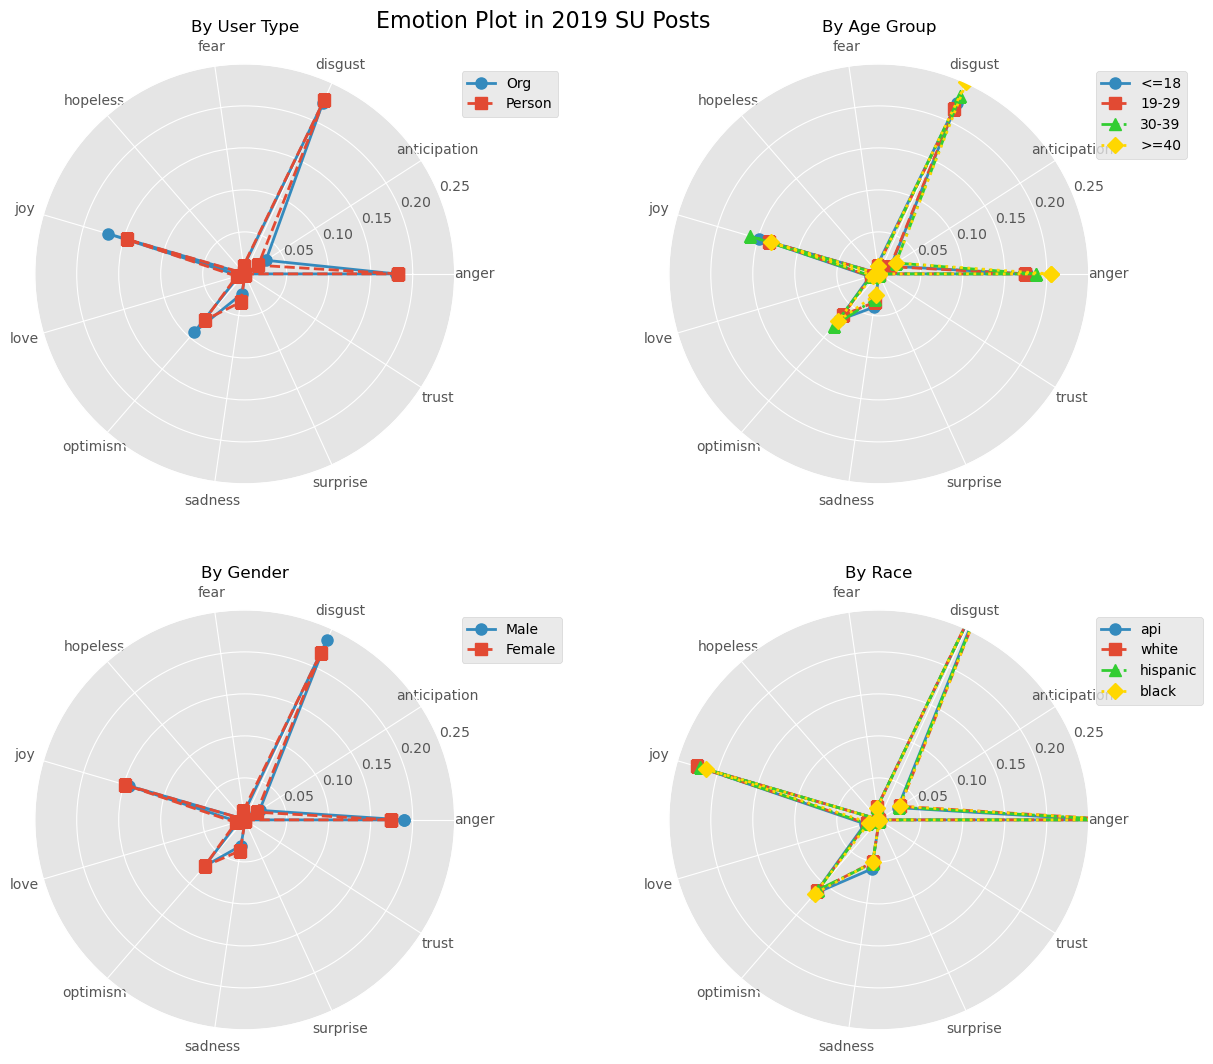

In [145]:
plot_all_trends(combined_result, 'Emotion Plot in 2019 SU Posts', '')